# Heat conduction of Composites

The aim of this lab is to investigate the heat conduction of composite materials. We will investigate the relation between effective heat conductivity and phase fraction of a "made-up" 2D composite.

## Computational domain

We have provided a set of three black-and-white images that will serve as our composites. These types of images can be obtained from X-Ray tomography data, microscopes (incl. SEM). Usually, they are grayscale and we have simply thresholded them.

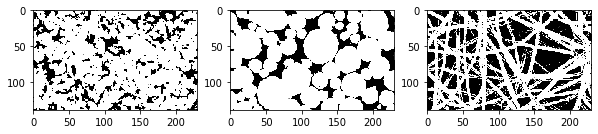

In [2]:
import matplotlib.pyplot as plt

composite1 = plt.imread('images/composite_1.tif')
composite2 = plt.imread('images/composite_2.tif')
composite3 = plt.imread('images/composite_3.tif')

fig=plt.figure(figsize=(10, 8));
fig.add_subplot(1, 3, 1);
plt.imshow(composite1);
fig.add_subplot(1, 3, 2);
plt.imshow(composite2);
fig.add_subplot(1, 3, 3);
plt.imshow(composite3);

These are TIFF images with a dynamic range from 0 to 255. The image size is 230x140. The first composite contains fairly small particles in a random arrangement. The second composite is similar but with much larger roughly spherical particles. The third composite is made of fibres.

## Phase fractions

Lets investigate the phase fractions of all three structures. We will do this by counting the number of white/black pixels relative to the total number of pixels.

In [3]:
import numpy as np;
phasefraction_1 = np.sum(composite1 > 120) / composite1.size;
phasefraction_2 = np.sum(composite2 > 120) / composite2.size;
phasefraction_3 = np.sum(composite3 > 120) / composite3.size;

print("Phase fraction Composite 1: {:6.3f}".format(phasefraction_1));
print("Phase fraction Composite 2: {:6.3f}".format(phasefraction_2));
print("Phase fraction Composite 3: {:6.3f}".format(phasefraction_3));

Phase fraction Composite 1:  0.793
Phase fraction Composite 2:  0.807
Phase fraction Composite 3:  0.567


In [9]:
phasefraction_3 = np.sum(composite3 < 120) / composite3.size
print("Phase fraction Composite 1: {:6.3f}".format(phasefraction_3));


Phase fraction Composite 1:  0.433


## Computational Problem

We will investigate the dynamic response of composite materials to an aprupt temperature change at time $t=0$. We will use normalised quantities to not be bothered with units etc. So the temperature change goes from $u=1$ to $u=0$ at time $t=0$ on the boundaries. The problem is described by this PDE

$$
\nabla (\lambda(x) \nabla u) = 0
$$

with the inhomogeneous heat conductivity $\lambda(x)$.